In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import lag_plot
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)


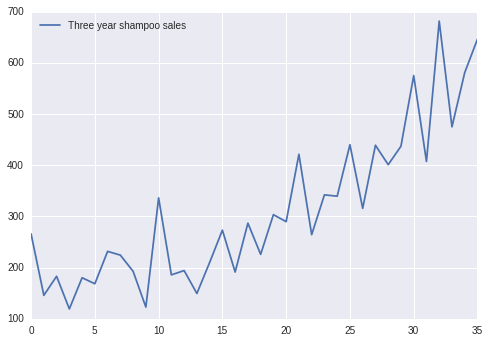

In [3]:
data.plot()
plt.show()

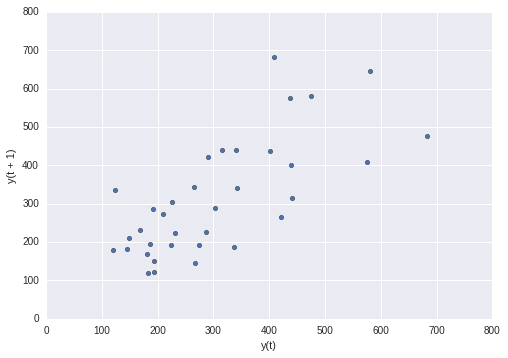

In [4]:
lag_plot(data['Three year shampoo sales'])
plt.show()

In [5]:
for i in range(1,11):
    values = DataFrame(data['Three year shampoo sales'].values)
    dataframe = concat([values.shift(i),values],axis=1)
    result = dataframe.corr()
    print(result)

          0         0
0  1.000000  0.719482
0  0.719482  1.000000
          0         0
0  1.000000  0.850743
0  0.850743  1.000000
          0         0
0  1.000000  0.754949
0  0.754949  1.000000
          0         0
0  1.000000  0.798898
0  0.798898  1.000000
          0         0
0  1.000000  0.797534
0  0.797534  1.000000
          0         0
0  1.000000  0.720113
0  0.720113  1.000000
          0         0
0  1.000000  0.744945
0  0.744945  1.000000
          0         0
0  1.000000  0.663472
0  0.663472  1.000000
          0         0
0  1.000000  0.687762
0  0.687762  1.000000
          0         0
0  1.000000  0.676003
0  0.676003  1.000000


/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


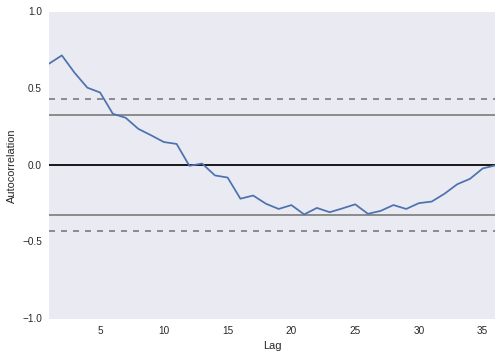

In [6]:
autocorrelation_plot(data['Three year shampoo sales'])
plt.show()

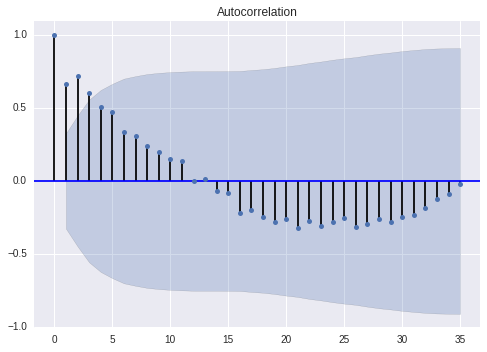

In [7]:
plot_acf(data['Three year shampoo sales'])

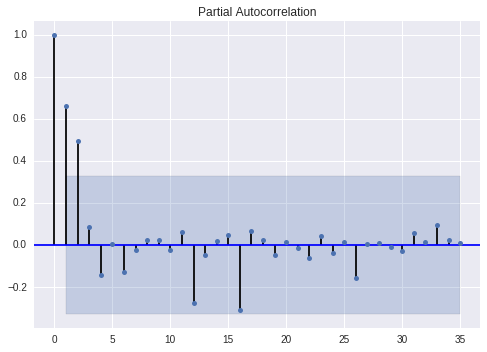

In [8]:
plot_pacf(data['Three year shampoo sales'])
#it also takes into account the intermediate values in between

In [10]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)
train = train.values
test = test.values

In [26]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv', header=0, squeeze=True)


In [28]:
l = len(data['month'])
for i in range(l):
    data['month'][i] = datetime.strptime('190'+data['month'][i],'%Y-%m')


/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
data = data.set_index('month')

KeyError: 'month'

In [33]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)
train = train.values
test = test.values

In [34]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -175.224
Method:                       css-mle   S.D. of innovations            156.556
Date:                Sun, 11 Mar 2018   AIC                            364.448
Time:                        23:25:01   BIC                            373.519
Sample:                             1   HQIC                           367.145
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3561     10.283     -0.132      0.896     -21.510      18.798
ar.L1.D.y     -0.6732      0.190     -3.540      0.002      -1.046      -0.300
ar.L2.D.y     -0.5356      0.221     -2.420      0.0

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

In [ ]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [ ]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

In [ ]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [ ]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

In [ ]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [ ]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

In [ ]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [ ]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)
l =len(data['month'])

In [ ]:
for i in range(l):
    data['month'][i] = '190'+data['month'][i]
    data['month'][i] = datetime.strptime(data['month'][i],'%Y-%m')

In [ ]:
data['month'] = pd.DatetimeIndex(data['month'])

In [ ]:
data = data.rename(columns={'month': 'ds',
                        'Three year shampoo sales': 'y'})

In [ ]:
train,test = train_test_split(data,test_size=0.3)

In [ ]:
model = Prophet(interval_width=0.90)
model.fit(train)

In [ ]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot_components(forecast)

In [ ]:
model.plot(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'],forecast['yhat'])
print('Test MSE: %.3f' % error)

In [ ]:
model = Prophet(interval_width=0.80)
model.fit(train)

In [ ]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot_components(forecast)

In [ ]:
model.plot(forecast)

In [ ]:
model = Prophet(interval_width=0.85)
model.fit(train)

In [ ]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot_components(forecast)

In [ ]:
model.plot(forecast)